# Modelos Lineares
---

## Agora o papo é reto!

Imagine que temos novamente um conjunto de dados de casas e seus preços, conforme apresentado abaixo:

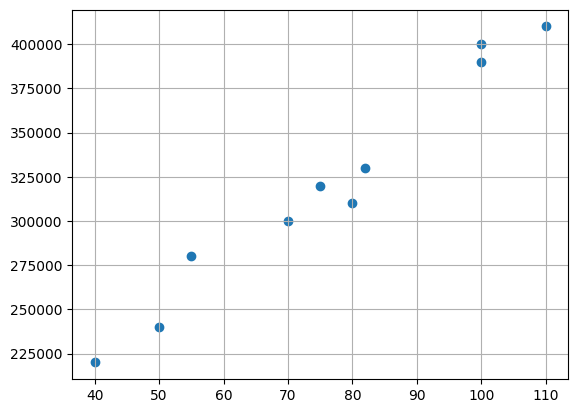

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

H = np.array([[100],
[110],
[50],
[70],
[80],
[40],
[100],
[55],
[75],
[82]])

P = np.array([400000, 410000, 240000, 300000, 310000, 220000, 390000, 280000, 320000, 330000])

plt.scatter(H[:,0], P)
plt.grid()

Na aula de *kNN* vimos que podemos utilizar os vizinhos mais próximos para estimar o preço de uma casa. Mas, venhamos e convenhamos, deve existir uma maneira mais simples de fazer isso, certo? Por exemplo: olhe para o gráfico acima e veja que forma parece está se formando. Posso não entender de alinhamentos planetários, mas uma coisa posso dizer: esses dados lembram uma reta!

Podemos definir uma reta que passa pela origem (ponto (0,0)) e definir o ângulo dela, por exemplo. Vamos tentar!

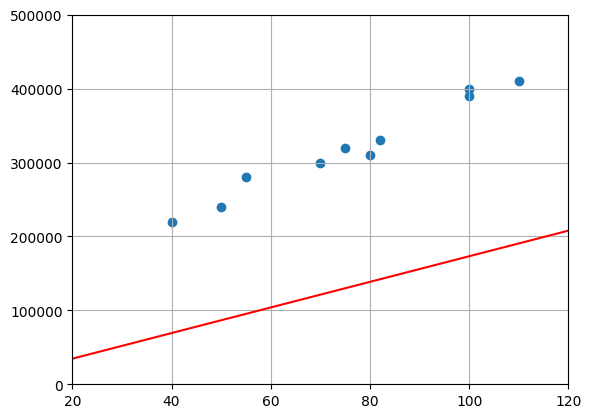

In [ ]:
from math import sin, cos, radians
theta = radians(30)
linelength = 200
x = linelength * cos(theta)
y = linelength * sin(theta) * 3000
plt.scatter(H[:,0], P)
plt.plot(np.array([0,x]),np.array([0,y]), c='r')
plt.xlim((20,120))
plt.ylim((0,500000))
plt.grid()

É, não ficou muito legal. Mas já é um começo!

Que outra maneira podemos definir uma reta?

- **Passando uma reǵua? **

    Bom, fica difícil passar uma régua no monitor, certo?


- **Escolhendo um ponto e traçar uma reta entre ele e a origem?**

    Tá, mas qual ponto?
    
    
- **Definir uma função?**

    Opa, parece um plano... Vamos ver no que dá!

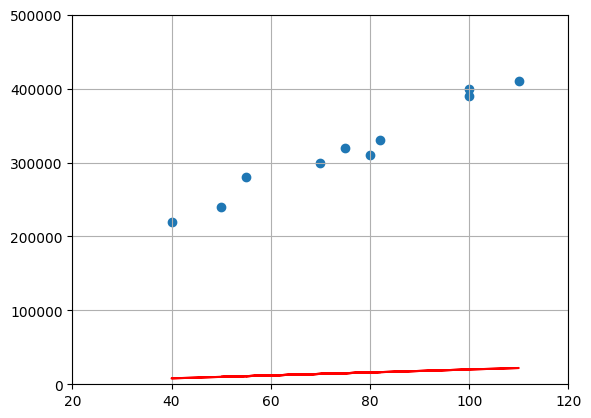

In [ ]:
def f(x):
    a = 200
    b = 20
    return a*x + b # f(x) = ax + b

plt.scatter(H[:,0], P)
plt.plot(np.array(H[:,0]),[f(x) for x in H[:,0]], c='r')
plt.xlim((20,120))
plt.ylim((0,500000))
plt.grid()

Não é que ficou interessante? Mas ficar procurando valores para *a* e *b* foi um pouco chato, né? Seria tão legal se houvesse uma maneira *automática* de fazer isso... se pudéssemos fazer o computador *aprender* esses valores...

CLARO QUE TEM UMA MANEIRA, GENTE!

## Regressão Linear

Como acabamos de ver, podemos definir uma função para representar nosso **modelo** de dados:

$$ \hat{y} = b + w \cdot x $$

In [ ]:
w = 2000
b = 200000

def predict(w,b,x):
    return b + (w * x)

Podemos ter diversas combinações de valores para *w* e *b*. A pergunta é: qual usar?

Vamos pensar um pouco:

* Para cada par (w,b) que escolhamos, geraremos um novo modelo $\hat{y}$
* Para cada modelo gerado, ele vai estimar valores diferentes para um dado $x_i$
* Essa estimativa terá um **erro** em relação ao valor correto $(y - \hat{y})$
* Se eu somar todos o erro de cada $x_i$ de uma combinação (w,b), nós teremos o erro do modelo (w,b) ( **E(w,b)** )
* Logo, basta achar uma combinação (w,b) que tenha o menor erro possível!

### Tá, mas como que faz isso?

Isso, jovem, é um problema de ***otimização***. A solução varia de acordo com o cálculo que você usa para calcular o erro. Uma métrica de erro muito comum utilizada é o *Erro quadrático*, o qual subtrai $y - \hat{y}$ e eleva o valor ao quadrado.

Há um dito popular que diz "*É errando que se aprende*". Bom, se é assim, então vamos deixar o computador ficar errando os valores e aprender com isso! Como foi dito, isso é um problema de otimização. Para resolvê-lo, utilizamos a técnica do **gradiente descendente**, a qual, após uma série de *abracadabras* matemáticos, chega na seguinte fórmula:

$$ w_{k+1} = w_{k} - \alpha ( \frac {2} {N} \sum_{i=1}^N (-x_i \cdot (y_i - \hat{y_i})) ) $$

$$ b_{k+1} = b_k - \alpha (\frac {2} {N} \sum_{i=1}^N -(y_i - \hat{y_i})) $$

A primeira fórmula diz o seguinte: para eu aprender um novo valor $w_{k+1}$, vou atualizar o valor $w_k$ que eu já tenho a partir de um gradiente(somatório entre parênteses) utilizando um fator de aprendizagem $\alpha$. Esse gradiente vêm do cálculo da derivada da função do erro quadrático. O mesmo vale para a segunda fórmula.

Sinta-se convidado a buscar na internet a demonstração da fórmula. É um conhecimento bem interessante para caso um dia você tenha de implementar seu próprio gradiente.

Agora chega de papo e vamos programar!

In [ ]:
def gradient_descendent(train_X, train_Y, alpha, w = 0, b = 0):
    sum_error = 0
    elem_times_error = 0
    n = len(train_X)
    for x,y in zip(train_X, train_Y):
        yhat = predict(w, b, x)
        error = y - yhat
        sum_error += error
        elem_times_error += x * error

    b = b + (2 * (alpha * sum_error) / n)
    w = w + (2 * (alpha * elem_times_error) / n)
    return (w,b)

Vamos iniciar nossos valores de $w$ e $b$ como 0 e ver o que temos

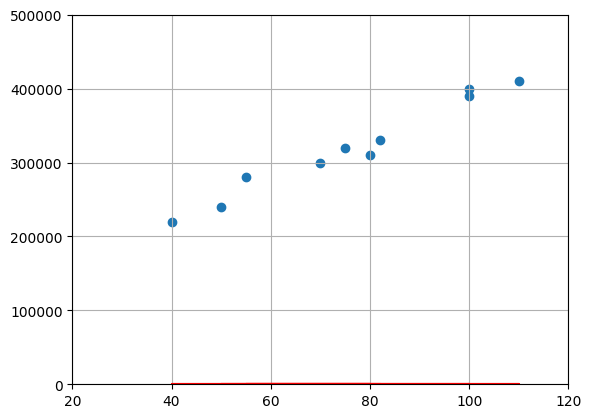

In [ ]:
w = 0
b = 0
plt.scatter(H[:,0], P)
plt.plot(np.array(H[:,0]),[predict(w,b,x) for x in H[:,0]], c='r')
plt.xlim((20,120))
plt.ylim((0,500000))
plt.grid()

Ok, nosso modelo só estima 0 para todo mundo. Vamos aplicar o cálculo do gradiente descendente uma vez, com um passo de aprendizagem bem pequeno, e ver como que fica

w: 514.32	b: 6.4


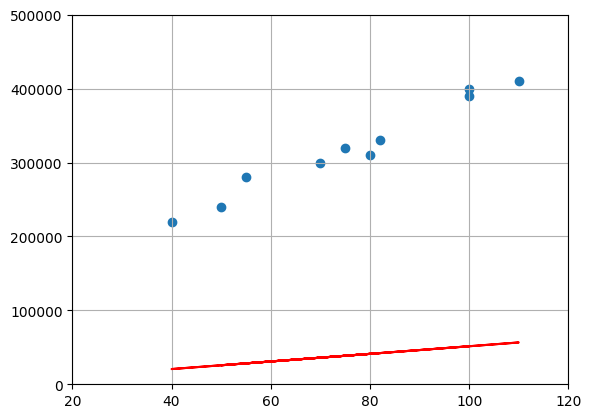

In [ ]:
w,b = gradient_descendent(H[:,0], P, 0.00001, w, b)
print("w: {}\tb: {}".format(w,b))
plt.scatter(H[:,0], P)
plt.plot(np.array(H[:,0]),[predict(w,b,x) for x in H[:,0]], c='r')
plt.xlim((20,120))
plt.ylim((0,500000))
plt.grid()

Já deu uma melhorada, não foi? Continue rodando a célula acima e veja se o modelo aprende!

**OBS:** se os valores de $w$ e $b$ começarem a variar muito pouco, ou sejá, o modelo não consegue ficar melhor, dizemos que ele **convergiu**

### Legal, mas me diz que já existe algo pronto, pro favor...

Claro que existe!

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Olha como é fácil criar um modelo de Regressão Linear:

In [ ]:
model = LinearRegression()

Olha como é ainda mais fácil treinar esse modelo!

In [ ]:
model.fit(H,P)

LinearRegression()

Vamos ver como que fica?

Mean Error: 10539.347432900066


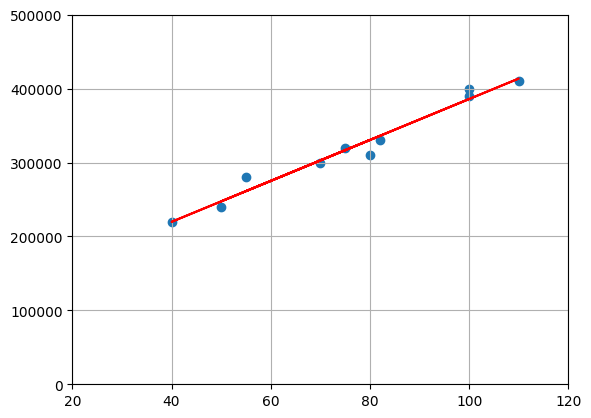

In [ ]:
y_predicted = model.predict(H)
plt.scatter(H[:,0], P)
plt.plot(np.array(H[:,0]),y_predicted, c='r')
plt.xlim((20,120))
plt.ylim((0,500000))
plt.grid()

error = np.sqrt(mean_squared_error(P,y_predicted))
print("Mean Error: {}".format(error))

Legal, não é?

### Pausa para o vinho

Calma, claro que não vamos parar essa aula maravilhosa para tomar vinho(embora não pareça uma má ideia), mas que tal se a gente misturasse essas duas coisas lindas juntas: vinhos e regressão linear?

No arquivo *winequality-white.csv* temos um conjunto de dados de qualidade do vinho que envolve a previsão da qualidade dos vinhos brancos em uma escala, com medidas químicas de cada vinho. É um problema de classificação multiclasse (algo que veremos mais na frente), mas também pode ser enquadrado como um problema de regressão. O número de observações para cada classe não é equilibrado. Existem 4.898 observações com 11 atributos de entrada e 1 atributo de saída. Os nomes das variáveis são os seguintes:

1. Fixed acidity.
2. Volatile acidity.
3. Citric acid.
4. Residual sugar.
5. Chlorides.
6. Free sulfur dioxide.
7. Total sulfur dioxide.
8. Density.
9. pH.
10. Sulphates.
11. Alcohol.
12. Quality (score between 0 and 10).

Que tal você fazer um modelo de regressão linear que seja capaz de aproximar a qualidade dessas bebidas? Ainda vou ser legal e vou deixar os dados carregados na memória para você!

In [ ]:
import pandas as pd
data = pd.read_csv("winequality-white.csv", delimiter=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Regressão Logística

(Infelizmente) Não podemos resolver todos os problemas de aprendizagem supervisionada com uma reta. Vejamos o exemplo a seguir

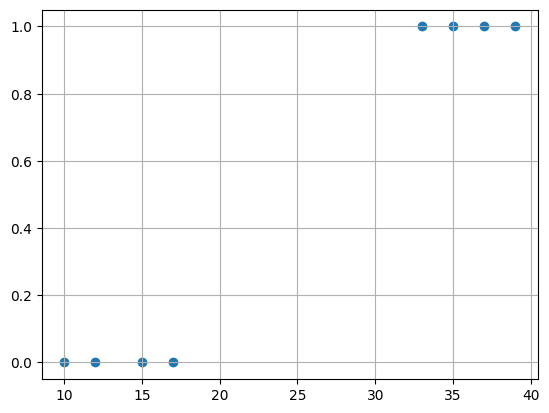

In [ ]:
M = np.array([[10],[12],[15],[17], [33],[35],[37],[39]])
V = np.array([0,0,0,0,1,1,1,1])

plt.scatter(M, V)
plt.grid()

Será que dá para traçar uma reta para resolver esse problema?

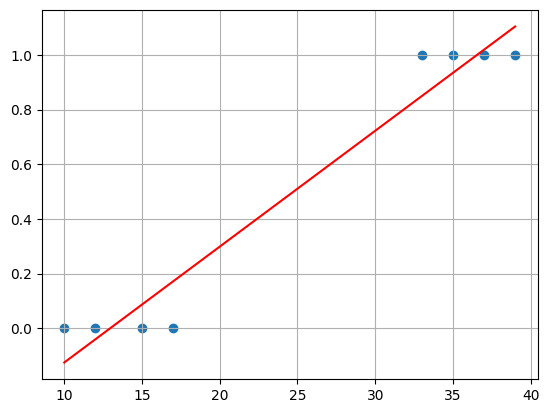

In [ ]:
model = LinearRegression()
model.fit(M,V)
y_predicted_linear = model.predict(M)
plt.scatter(M, V)
plt.grid()
plt.plot(M,y_predicted_linear, c='r')

É, não ficou legal... mas por quê?

No eixo Y, temos apenas dois valores: 0 e 1. Ou seja, nosso modelo tem de prever um desses dois valores. Nesse caso, a saída do modelo é *discreta*. Isso é diferente do nosso exemplo anterior, onde tínhamos uma saída *contínua*. Isso quer dizer que lidamos com um problema de ***classificação***!

### Tá, o problema é outro agora, mas como que resolve?

Bom, nesse caso, teremos de usar outro tipo de função que não seja a linear. Para isso, usaremos a **Função Logística**!

$$ \hat{y} = \frac {1} {1 + e^{-(b+w \cdot x)}} $$

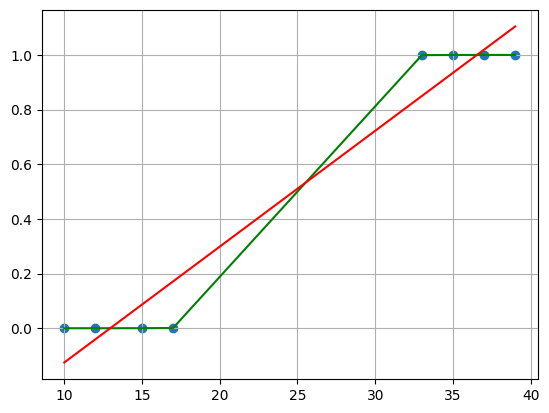

In [ ]:
from math import exp
def logistic_function(w,b,x):
    return 1 / ( 1 + exp( - ( b+(w*x) ) ) )

w = 0.89
b = -22.1
plt.scatter(M, V)
plt.grid()
plt.plot(M, [logistic_function(w,b,x) for x in M[:,0]], c='g')
plt.plot(M,y_predicted_linear, c='r')

Opa, agora ficou legal!

Assim como a Regressão Linear, a **Regressão Logística** também pode ser mapeada para um problema de otimização para encontrar o menor erro para $w$ e $b$. A prova é TRIVIAL(só que não) e análoga à do gradiente descendente mostrado anteriormente. Deixamos como exercício pesquisar sobre ela.

Agora, vamos a parte que interessa: como usar a biblioteca!

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(penalty="l2", C=1e42) #estes argumentos desabilitam a regularização
model.fit(M,V)

LogisticRegression(C=1e+42)

Vamos ver se fica legal?

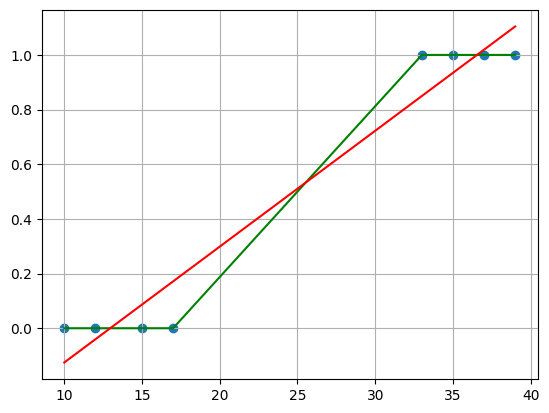

In [ ]:
y_predicted = model.predict(M)
plt.scatter(M, V)
plt.grid()
plt.plot(M,y_predicted, c='g')
plt.plot(M,y_predicted_linear, c='r')

### Tá, mas você disse que a aula era de modelos lineares. A função logística não é uma linha, pelo menos não uma reta. Que pegadinha é essa?

Não tem pegadinha nenhuma, é só uma questão de *perspectiva*. Se tentarmos visualizar os dados no espaço é como se houvesse uma *linha* separando os conjuntos de dados! Para ser mais algébrico, a função logística define um *hiperplano* que separa os dados!

Para ficar mais simples de entender, dê uma olhada na figura abaixo:

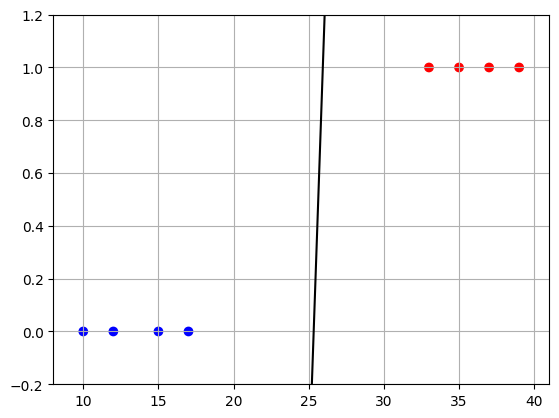

In [ ]:
points_x=[x for x in range(10,41)]

line_bias = model.intercept_
line_w = model.coef_.T
points_y=[(line_w[0]*x+line_bias) for x in points_x]
plt.plot(points_x, points_y, 'k')
plt.scatter(M,V,c=["b" if v == 0 else "r" for v in V])
plt.xlim((8,41))
plt.ylim((-0.2,1.2))
plt.grid()

A linha preta mostra a **superfície de decisão** gerada pela função logística aprendida: tudo o que está à direita da linha é classificado como vermelho, enquanto o que está à esquerda, azul.

### Se for dirijir, não beba. Se for beber, beba vinho

Se lembra que foi dito que o problema de qualidade dos vinhos era um problema de *classificação*? Bem, como agora nós sabemos como resolver esse tipo de problema de uma maneira mais correta, vamos fazê-lo!

## Naive Bayes

Existem algumas maneiras interessantes para definir um cientista de dados. Duas delas são "*Um estatístico que sabe computação*" e "*Um computólogo que sabe estatística*". Estatística é uma arma poderosa que nunca deve ser deixada de lado quando se trabalha com dados. Vamos explorar um pouco mais dela agora.

Lembra-se do dataset de vinhos? (Sei que sim, visto que você acabou de fazer um exercício com ele)

Então, vamos dar uma olhada em algumas métricas de estatística descritiva sobre os atributos:

In [ ]:
import pandas as pd
df = pd.read_csv("winequality-white.csv", delimiter=';')
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Outra coisa interessante que podemos notar é a **correlação** entre os atributos, ou seja, como os atributos influenciam entre si:

In [ ]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


É, da pra ver que existem atributos fortemente e fracamente correlacionados...

Vamos ver, agora, a covariância entre eles:

In [ ]:
df.cov()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,0.712114,-0.001931,0.029533,0.381022,0.000426,-0.708919,3.266013,0.000670,-0.054265,-0.001651,-0.125533,-0.084947
volatile acidity,-0.001931,0.010160,-0.001823,0.032865,0.000155,-0.166300,0.382354,0.000008,-0.000486,-0.000411,0.008400,-0.017382
citric acid,0.029533,-0.001823,0.014646,0.057829,0.000302,0.193630,0.622989,0.000054,-0.002992,0.000861,-0.011278,-0.000987
residual sugar,0.381022,0.032865,0.057829,25.725770,0.009828,25.800578,86.531303,0.012727,-0.148684,-0.015435,-2.812740,-0.438316
chlorides,0.000426,0.000155,0.000302,0.009828,0.000477,0.037674,0.184687,0.000017,-0.000298,0.000042,-0.009684,-0.004062
free sulfur dioxide,-0.708919,-0.166300,0.193630,25.800578,0.037674,289.242720,444.865891,0.014966,-0.001587,0.114938,-5.234509,0.122878
total sulfur dioxide,3.266013,0.382354,0.622989,86.531303,0.184687,444.865891,1806.085491,0.067352,0.014894,0.652645,-23.476605,-6.576746
density,0.000670,0.000008,0.000054,0.012727,0.000017,0.014966,0.067352,0.000009,-0.000042,0.000025,-0.002871,-0.000814
pH,-0.054265,-0.000486,-0.002992,-0.148684,-0.000298,-0.001587,0.014894,-0.000042,0.022801,0.002688,0.022565,0.013297
sulphates,-0.001651,-0.000411,0.000861,-0.015435,0.000042,0.114938,0.652645,0.000025,0.002688,0.013025,-0.002448,0.005425


A matriz de covariância é muito importante quando lidamos com *FDPs* (Função de Densidade Probabiística). Podemos usar essas funções para calcular a probabilidade de um elemento $x$ pertencer a uma classe $c$ (a qual possui matriz de covariância $C$ e média dos atributos $M_c$) utilizando uma FPD Gaussiana, por exemplo:


$$ p_c(x) = \frac{1}{\sqrt{2 \cdot \pi \cdot |C|}} \cdot e^{-(\frac {(x - M_c)^2} {2 \cdot |C|})}$$

Pela lógica, a classe $c$ que tiver maior probabilidade é a classe que representará $x$. Mas há um porém na fórmula acima(não, não é a fórmula em si). Qual você acha que é?

### E se formos mais ingênuos (Naive)?

Calcular o determinante da matriz de covariância pode ser(quando possível) bem complicado. Sabe um tipo de matriz que é fácil de calcular o determinante? As diagonais. Poxa, matrizes diagonais são lindas! Basta multiplicar os elementos da diagonal principal e.. pronto! Temos o determinante!

Se ao menos nossa matriz de covariância fosse diagonal...

Mas espera, e se nos forçarmos ela a ser?

E se assumirmos que os atributos são **independentes**, ou seja, eles não influenciam uns nos outros? Se for assim, não haveria correlação. Não havendo correlação, *os elementos fora da diagonal principal serão nulos*!

Por isso a técnica chama-se Naive Bayes: pois ela assume que os atributos são todos independentes e não influenciam uns nos outros. É muita ingenuidade, não é mesmo?

Nesse caso, a fórmula ficaria bem mais simples, pois o determinante da matriz de covariância é nada mais do que a variância!

$$ p_c(x) = \frac{1}{\sqrt{2 \cdot \pi} \cdot std_c} \cdot e^{-(\frac {(x - M_c)^2} {2 \cdot var_c})}$$

Agora que entendemos um pouco do que é o Naive Bayes, podemos usá-lo! (Sim, só podemos usá-lo porque entendemos ele. Um bom cientista de dados nunca usa uma técnica que ele não entende).

O scikit-learn traz 3 implementações de Naive Bayes: Gaussiana, Bernoulli e Multinomial. Consegue identificar a diferença entre elas?

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

In [ ]:
gaussian_model = GaussianNB()
bernoulli_model = BernoulliNB()
multinomial_model = MultinomialNB()

Experimente os modelos com o dataset de vinhos e veja como eles se comportam! Lembre-se:
* Para treinar um modelo, use o método *fit*
* Para computar o desempenho, utilize o método *score*

## SVM - Support Vector Machine

Este classificador utiliza uma matemática bem pesada para funcionar(não é a toa que ele é bem poderoso), então daremos apenas uma visão geral sobre como ele funciona.

Primeiro de tudo: o que é um **vetor de suporte**? Um vetor é dito de suporte quando ele foi *classificado incorretamente* ou *está próximo da superfície de decisão*. O SVM utiliza esses vetores para tornar mais rápido o treinamento do modelo, sem precisar analisar todos os dados! Ele é tão poderoso que, se removermos todos os dados que não podem ser um vetor de suporte, o modelo não será afetado!

Vamos começar com o exemplo abaixo, o qual foi obtido de um [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html). Utilizaremos uma função para gerar dados sintéticos.

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

ModuleNotFoundError: ignored

Conseguimos ver, facilmente, que há diversas maneiras de separar esses dados. Cada separação é um modelo *diferente* do outro, entretanto, eles dividem *perfeitamente* os dados. Porém, supondo que um novo dado chegue (digamos, por exemplo, o X), dependendo do modelo que escolhermos, o elemento será classificado de maneira diferente!

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

A ideia por trás do SVM é explorar a *margem* da superfície de decisão gerada, conforme o exemplo abaixo. O modelo que tiver uma maior margem será o modelo mais adequado.

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

(Ainda bem que) O SVM já está implementado no scikit learn! Podemos importá-lo e usá-lo como os outros modelos vistos até agora!

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"

Vamos definir um modelo com *kernel* linear e um alto valor de *regularização* (explicaremos os conceitos mais adiante no curso)

In [ ]:
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

Definiremos também uma função para auxiliar na visualização do modelo gerado pelo SVM

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Vamos explorar agora o modelo treinado

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

O modelo gerado pelo SVM maximizou a margem entre os conjuntos de pontos, conforme o esperado. Qualquer outra linha que tentemos traçar irá diminuir as margens.

Podemos identificar que 3 vetores foram escolhidos como vetores de suporte: 2 vermelhos e 1 amarelo.

In [ ]:
model.support_vectors_

Como dissemos no começo, apenas os vetores de suporte importam! Se removermos os elementos mais distantes da superfície de decisão, por exemplo, não haverá nenhum impacto sobre o treinamento do modelo!

In [ ]:
def train_and_plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    train_and_plot_svm(N, axi)
    axi.set_title('Número de amostras = {0}'.format(N))

### Tá, mas e esse tal de kernel?

Kernel é uma ferramente que permite deixar o SVM ainda mais poderoso do que ele já é! Ele permite que transformemos nossos dados de tal maneira que ele possa ser mais facilmente separável!

Suponhamos o seguinte exemplo:

In [ ]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

model = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model, plot_support=False);

Está bem claro que esse dado não é *linearmente separável*, ou seja, não há como separá-lo utilizando apenas uma reta. É aí que o kernel vai entrar!

Suponha que apliquemos uma *função radial* que seria uma terceira dimensão em nosso dado:

In [ ]:
r = np.exp(-(X ** 2).sum(1))

Agora vamos plotar o dado com essa nova dimensão!

In [ ]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

plot_3D(elev=30, azim=-50, X=X, y=y)

Não sei para você, mas para mim parece que o dado é *linearmente separável* agora!

Claro, se nossa função radial não tivesse sido escolhida cautelosamente, pode ser que o resultado não fosse tão agradável. Seria bom se pudéssemos fazer essa projeção de uma maneira automática, certo?

Uma maneira *simples* porém *custosa* seria definir uma função radial para cada amostra do dado, ou seja, se temos N amostras, adicionaremos N dimensões! Depois, deixamos o SVM identificar os vetores suporte necessários para definir o modelo. Não precisa nem fazer as contas para dizer que isso é custoso, certo? Então, como faremos?

Claro que o scikit learn já trouxe tudo implementado para a gente! Lembra-se que havíamos definido o *kernel* do modelo como *linear*? Pois bem, basta mudar para *RBF*(*radial basis function*) que está pronto! E mais: o método é otimizado internamente para que não seja necessário criar as N novas dimensões!

In [ ]:
model = SVC(kernel='rbf', C=1E6)
model.fit(X, y)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

### Olha, se você não estivesse explicando, eu dizia que era mágica... mas e o parâmetro $C$?

Calma que o melhor ficou para o final. Vimos nos exemplos anteriores o SVM funcionando para datasets onde os dados estão bem separados(linearmente ou não). Mas suponha o seguinte conjunto de dados:

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

No exemplo acima, existem porções dos dados que estão um pouco misturadas. Para tratar isso, o SVM traz um artifício para *suavizar* as margens, permitindo que pontos sejam classificados errados em prol de um melhor ajuste do modelo (lembra-se que um vetor de suporte também poderia ser um dado classificado erroneamente?). E quem controla isso? Exato! É o $C$!

Para maiores valore de $C$, a margem é *rígida*, impedindo pontos de serem classificados erroneamente. Para valores menores, a margem é *flexível*.

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

### Para refletir

- Que valores de C são melhores? Grandes ou pequenos?
- Qual o melhor kernel para ser usado?
- Exercício para o leitor: que outros kernels exitem?

### Para praticar

Antes de ir para os alcóolicos anônimos, vamos mexer mais uma vez com os dados de vinhos, mas dessa vez, utilize o SVM, vendo como a classificação se comporta com os kernels *linear* e *RBF*. Varie também os valores de $C$ e reflita sobre os resultados!